# Global CO₂ Emissions Analysis
## Notebook 2: Exploratory Analysis

Identify top emitters in absolute terms and per-capita, and explore differences with population filters.

**Key questions:**
- Who are the largest absolute emitters?
- Who has the highest per-capita emissions?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 =  pd.read_csv("/content/annual-co2-emissions-per-country.csv")
df2 = pd.read_csv("/content/co-emissions-per-capita.csv")
df3 = pd.read_csv("/content/co2-by-source.csv")
df4 = pd.read_csv("/content/population.csv")
df4.columns = ["Entity", "Code", "Year", "Population"] #rename population columns for clarity

df = df1.merge(df2,on=["Entity","Code","Year"],how="outer").merge(df3,on=["Entity","Code","Year"],how="outer").merge(df4,on=["Entity","Code","Year"],how="outer")

df = df.dropna(subset="Code")
df = df[~(df["Entity"]=="World")]
df = df[df["Year"]>=1960]
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending = False)
print(missing)


Annual CO₂ emissions from other industry    31859
Annual CO₂ emissions from gas               26409
Annual CO₂ emissions from coal              24478
Annual CO₂ emissions from flaring           24461
Annual CO₂ emissions from cement            20365
Annual CO₂ emissions from oil               20141
Annual CO₂ emissions (per capita)           20126
Annual CO₂ emissions                        20043
Population                                    120
dtype: int64


Top 10 absolute emitters (2024):
              Entity  Annual CO₂ emissions
11760          China          1.228904e+10
56571  United States          4.904120e+09
26147          India          3.193478e+09
45696         Russia          1.780524e+09
28611          Japan          9.618673e+08
26359      Indonesia          8.122202e+08
27100           Iran          7.926312e+08
47574   Saudi Arabia          6.921335e+08
50717    South Korea          5.836792e+08
21405        Germany          5.723192e+08


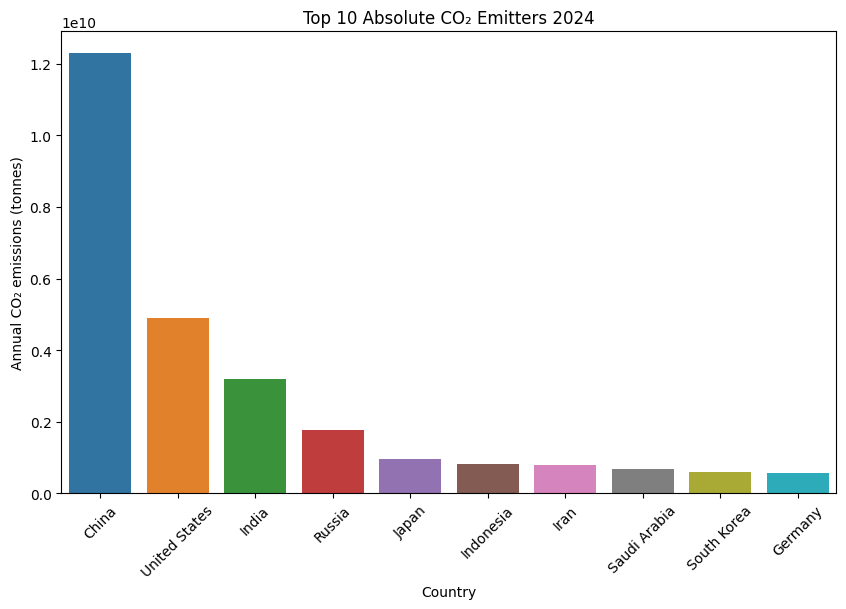

In [ ]:
# we identify the countries with the highest total annual CO₂ emissions.
last = 2024
df_last = df[df["Year"]==last].copy()
df_last["rank"] = df_last["Annual CO₂ emissions"].rank(ascending=False,method="first")
top10_absolute = df_last.sort_values("rank").head(10)

print("Top 10 absolute emitters (2024):")
print(top10_absolute[["Entity", "Annual CO₂ emissions"]])

palette_abs = sns.color_palette("tab10", n_colors=10)
plt.figure(figsize=(10,6))
sns.barplot(x="Entity",y="Annual CO₂ emissions",data = top10_absolute, palette=palette_abs, hue="Entity")
plt.title("Top 10 Absolute CO₂ Emitters 2024")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Annual CO₂ emissions (tonnes)")
plt.show()

Top 10 per-capita emitters (2024):
                          Entity  Annual CO₂ emissions (per capita)
45053                      Qatar                          41.271180
29770                     Kuwait                          26.247530
9190                      Brunei                          26.046202
5539                     Bahrain                          24.270082
53831        Trinidad and Tobago                          22.931944
47574               Saudi Arabia                          20.379194
55919       United Arab Emirates                          20.131075
38619              New Caledonia                          18.064400
48959  Sint Maarten (Dutch part)                          16.546274
42566                       Oman                          15.651107


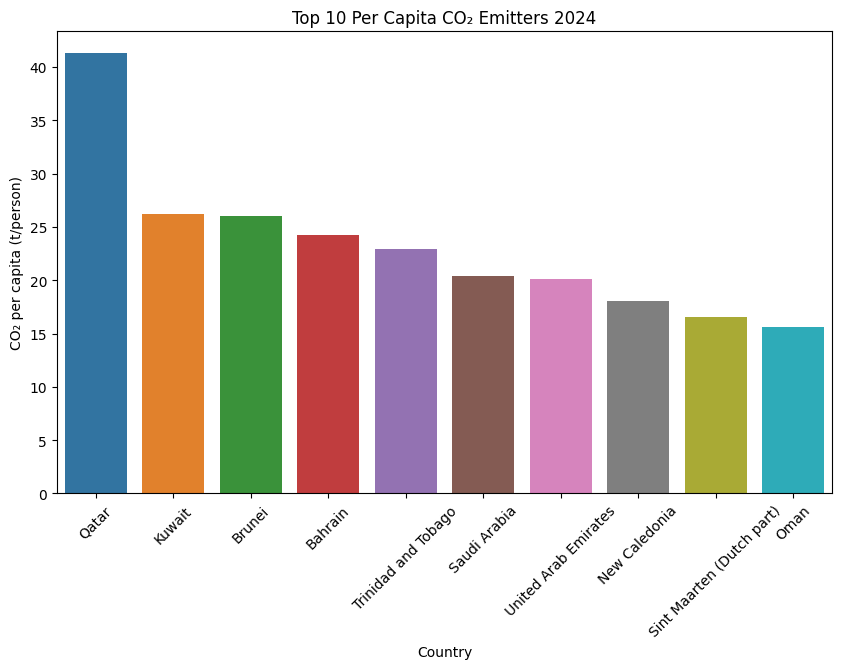

In [ ]:
# we identify the countries with the highest per capita emissions.
df_last = df_last.dropna(subset="Annual CO₂ emissions (per capita)")
df_last["rank per capita"] = df_last["Annual CO₂ emissions (per capita)"].rank(ascending=False,method="first")
top10_per_capita = df_last.sort_values("rank per capita").head(10)

print("Top 10 per-capita emitters (2024):")
print(top10_per_capita[["Entity", "Annual CO₂ emissions (per capita)"]])

plt.figure(figsize=(10,6))
sns.barplot(x="Entity",y="Annual CO₂ emissions (per capita)",data = top10_per_capita, palette=palette_abs, hue="Entity")
plt.title("Top 10 Per Capita CO₂ Emitters 2024")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("CO₂ per capita (t/person)")
plt.show()


# The per capita ranking is dominated by small, wealthy oil-producing countries, Gulf states and small territories, which may distort the global picture.

Top 10 per-capita emitters (population ≥ 1M):
                     Entity  Annual CO₂ emissions (per capita)
45053                 Qatar                          41.271180
29770                Kuwait                          26.247530
5539                Bahrain                          24.270082
53831   Trinidad and Tobago                          22.931944
47574          Saudi Arabia                          20.379194
55919  United Arab Emirates                          20.131075
42566                  Oman                          15.651107
4505              Australia                          14.477199
56571         United States                          14.197287
29162            Kazakhstan                          13.937352


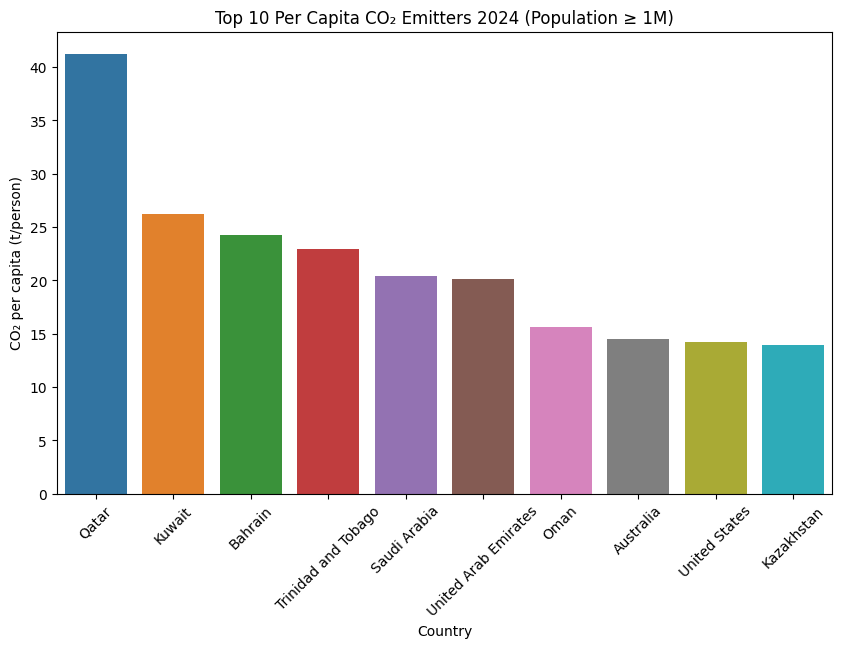

In [ ]:
# To focus on countries with significant global impact, let's re-rank per capita emissions after filtering for countries with population ≥ 1 million. This removes micro-states and gives a more policy-relevant picture.
pop_treshold = 1000000
df_filtered = df_last[df_last["Population"]>= pop_treshold].copy()
df_filtered["rank_per_capita_filtered"] = df_filtered["Annual CO₂ emissions (per capita)"].rank(ascending=False, method="first")
top10_per_capita_filtered = df_filtered.sort_values("rank_per_capita_filtered").head(10)

print("Top 10 per-capita emitters (population ≥ 1M):")
print(top10_per_capita_filtered[["Entity", "Annual CO₂ emissions (per capita)"]])

plt.figure(figsize=(10,6))
sns.barplot(x="Entity",y="Annual CO₂ emissions (per capita)",data = top10_per_capita_filtered, palette=palette_abs, hue="Entity")
plt.title("Top 10 Per Capita CO₂ Emitters 2024 (Population ≥ 1M)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("CO₂ per capita (t/person)")
plt.show()


In [ ]:
# Let's see which countries appear in both top 10 lists.
top10_common = top10_absolute[top10_absolute["Entity"].isin(top10_per_capita_filtered["Entity"])]
print("common_countries:")
print(top10_common[["Entity"]])


common_countries:
              Entity
56571  United States
47574   Saudi Arabia


## Key Findings

### 1. Absolute Emissions:

Top 3 emitters account for ca.66% of top 10 total:
- China: 12.3 GtCO₂ (2.5 times USA, nearly 4 times India), alone emits more than the next 3 countries combined.
- USA: 4.9 GtCO₂
- India: 3.2 GtCO₂


The top 10 includes a mix of Large developing economies (China, India, Indonesia), developed economies (USA, Japan, Germany, South Korea), major oil/gas producers (Russia, Iran, Saudi Arabia). Indonesia's presence (#6) may reflect rapid industrialization and deforestation processes.


### 2. Per-Capita Emissions (Unfiltered):

Extreme concentration in oil-producing states:
- Qatar: 41.3 t/person (nearly 3 times USA, 10 times global average)
- Kuwait: 26.2 t/person
- Bahrain: 24.3 t/person
- Saudi Arabia: 20.4 t/person
- UAE: 20.1 t/person

The reasons behind these results may be the heavy reliance on oil/gas for electricity (cheap domestic energy), the energy-intensive industries (petrochemicals, desalination, gas flaring) and the relative small populations.

In this rank we can also observe some micro-states with atypical emission profiles. Limited policy relevance for global climate action.

### 3. Per-Capita Emissions (Population ≥ 1M):

After filtering, we see Gulf states are still dominant and we observe some developed econnomies such as:  
- Australia: 14.5 t/person
- USA: 14.2 t/person


### 4. Overlap Analysis

- Most large absolute emitters have moderate per-capita emissions (China: ~8.5 t/person, India: ~2.2 t/person)
- Most high per-capita emitters are small in population (Gulf states, <10M)
- USA and Saudi Arabia are the only cases of being both large emitters and highly inefficient per capita.


### 5. Three Archetypes of High Emitters

**Type A**: China, India, Indonesia
- Massive absolute emissions due to population size
- Per-capita emissions moderate (2-10 t/person) or below global average
- Still in industrial development phase
- Historical responsibility lower than developed countries

**Type B**: Qatar, Kuwait, UAE, Bahrain, Oman
- Small absolute emissions (<1 GtCO₂) due to low population
- Extremely high per capita emissions (15-40 t/person)
- Oil/gas-dependent economies

**Type C**: USA, Australia, Canada, Russia  
- Large absolute emissions
- High per-capita emissions (12-15 t/person)
- Developed economies with high consumption
- Have the financial and technological capacity to decarbonize
- Historical responsibility (cumulative emissions) very high


